# Table of Contents
 <p>

Notebook to prepare Boundary Bay csv files for t_tide analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
file2013 = './B Bay Tide Levels 2013 Email.xlsx'
file2014 = './B Bay Tide Levels 2014 Email.xlsx'
file2015 = './B Bay Tide Levels 2015 Email.xlsx'
file2016 = './B Bay Tide Levels 2016 Email.xlsx'

In [3]:
def process_file(filename, outfile, yearend):
    data = pd.read_excel(filename, skiprows=5)
    data.replace('Bad', np.NaN, inplace=True)
    data['Time'] = pd.to_datetime(data['Time Avg Start'], format='%d-%m-%Y %H:%M')
    data.set_index('Time', inplace=True)
    data['wlev'] = pd.to_numeric(data['511 (Bay) 10 Minute Avg'])
    data.mask(np.abs(data['wlev']) > 5., np.NaN, inplace=True) 
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    ax.plot(data.index, data.wlev)
    mean = data['wlev'].mean()
    print('Mean is:', mean)
    hourly = data.resample(rule='1H', closed='left', label='left', loffset=pd.Timedelta(minutes=0)).mean()
    out_data = hourly[['wlev']].copy()
    out_data = out_data[np.isfinite(out_data['wlev'])]
    out_data = out_data[out_data.index < pd.Timestamp(yearend)]
    out_data.to_csv(outfile, date_format='%Y-%m-%d %H:%M')
    ax.plot(out_data.index, out_data.wlev)
    return mean

In [4]:
# eyquem on stackoverflow
def line_prepender(filename, line1, line2):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line1.rstrip('\r\n') + '\n' + line2.rstrip('\r\n') + '\n' + content)

Mean is: 0.15777265151251937


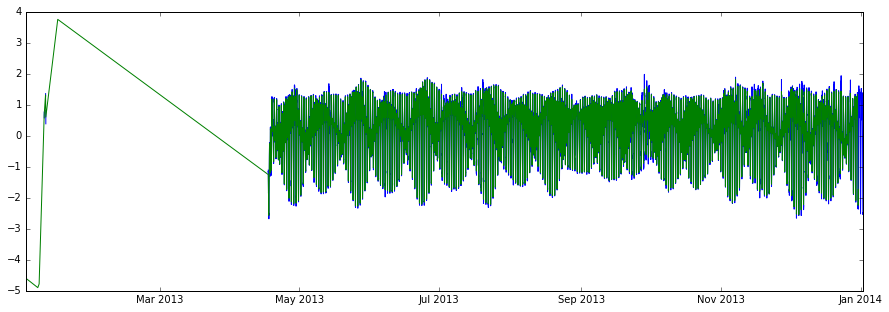

In [5]:
outfile = 'BoundaryBay_2013_wlev.csv'
process_file(file2013, outfile, yearend = '2013-12-31')
line_prepender(outfile, 'Time: PST, wlev: m', 'Latitude, 49.0')

Mean is: 0.2556228781208616


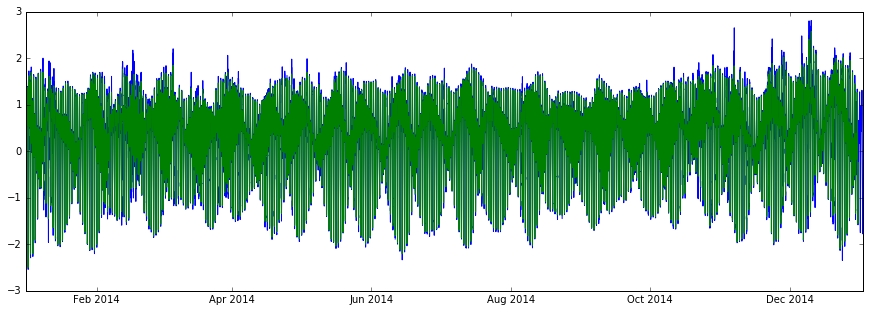

In [6]:
outfile = 'BoundaryBay_2014_wlev.csv'
process_file(file2014, outfile, '2014-12-31')
line_prepender(outfile, 'Time: PST, wlev: m', 'Latitude, 49.0')

Mean is: 0.2716598912364301


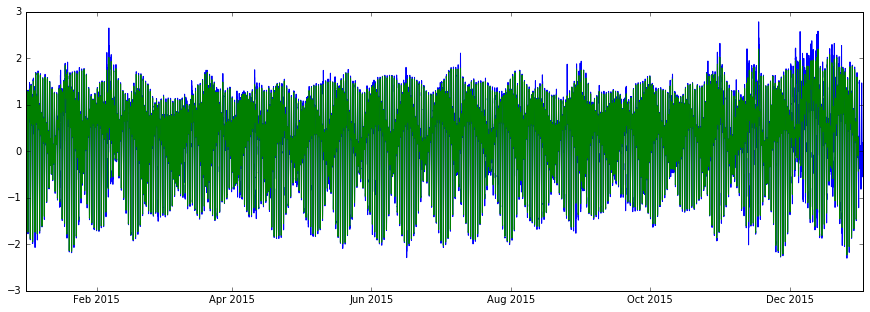

In [7]:
outfile = 'BoundaryBay_2015_wlev.csv'
process_file(file2015, outfile, '2015-12-31')
line_prepender(outfile, 'Time: PST, wlev: m', 'Latitude, 49.0')

Mean is: 0.2733532823334602


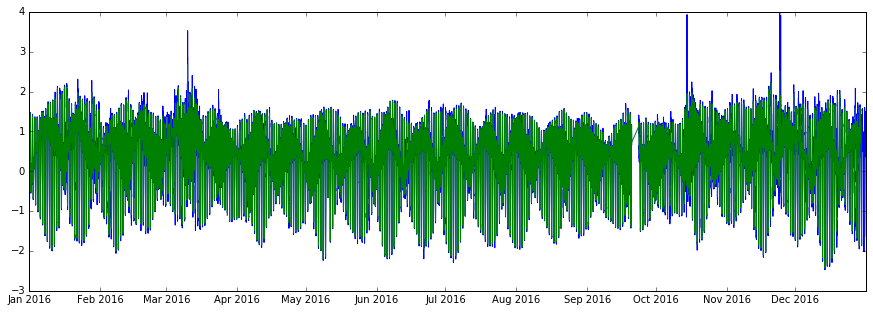

In [8]:
outfile = 'BoundaryBay_2016_wlev.csv'
process_file(file2016, outfile, '2016-12-30')
line_prepender(outfile, 'Time: PST, wlev: m', 'Latitude, 49.0')